In [4]:
import tensorflow
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

model = VGG16()

W0906 09:59:48.014172   996 deprecation.py:506] From C:\Users\Affinity\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
from PIL import Image
import time 
import numpy as np
import matplotlib.pyplot as plt

img = np.array(Image.open("./bird.jpg").resize((224, 224)))#이미지열고, 넘파이배열로 224,224사이즈변경

start = time.time() #현재시간
yhat = model.predict(img.reshape(-1, 224, 224, 3)) #넘파이배열로변환
time = time.time() - start #1초후시간->중가네걸린시간
label_key = np.argmax(yhat) #최대값찾기 
label = decode_predictions(yhat) #확률을 해석
label = label[0][0] #가장 가능성 높은 결과를 찾기

print("테스트 시 소요 시간 : {}".format(time)) #소요시간확인
print('%s (%.2f%%)' % (label[1], label[2]*100)) #분류된거 보여주기
print(label[2])


테스트 시 소요 시간 : 0.27253270149230957
macaw (31.28%)
0.31277478


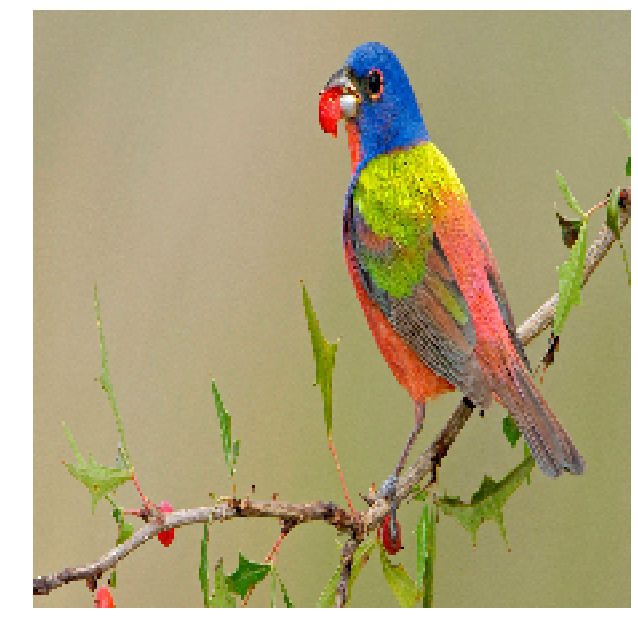

In [6]:
plt.figure(figsize=(11,11))#피겨 생성
plt.imshow(img)
plt.axis("off")
plt.show()#보여줌

In [7]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     